In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import qutip as qt
# import h5py

## Hamiltonian

## Oscillator

In [158]:
EC = 0.14
EJ = 6.0
EL = EJ

N = 100
a = qt.destroy(N)
ϕ_zpf = (2*EC/EL)**0.25
n_zpf = (EL/(32*EC))**0.25
ϕ = ϕ_zpf*(a + a.dag())
n = n_zpf/1j*(a - a.dag())

cosϕ = ϕ.cosm()
sinϕ = ϕ.sinm()

T =4*EC*n*n

In [163]:
N = 1000
phis = np.linspace(-np.pi, np.pi, N+1)
phis = phis[:-1]
dphi = (phis[1] - phis[0])  # generates step size ([-1] returns last value in array)

cosϕ = qt.Qobj(np.diag(np.cos(phis)))
sinϕ = qt.Qobj(np.diag(np.sin(phis)))
ϕ = qt.Qobj(np.diag(phis))

Tdiag = -2 * np.eye(N)  # eye(N) returns N-d identity matrix
Tupper = +np.eye(N, k=+1)  # diag returns a 2D array of first number on the 2nd number diagonal
Tlower = +np.eye(N, k=-1)
T = (Tdiag + Tupper + Tlower)
# T[0, -1] = 1
# T[-1, 0] = 1
T = -T* 4 * EC / dphi ** 2
T = qt.Qobj(T)

def get_H(ϕext = 2*np.pi*0.5): 
    H = 2*T \
      - EJ*cosϕ*np.cos(ϕext) \
      + EJ*sinϕ*np.sin(ϕext) \
      + EJ*ϕ*ϕ/2/10
    return H

In [164]:
def get_H(ϕext = 2*np.pi*0.5): 
    H = T \
      + EL*ϕ*ϕ/2
    return H

(-1.0, 1.0)

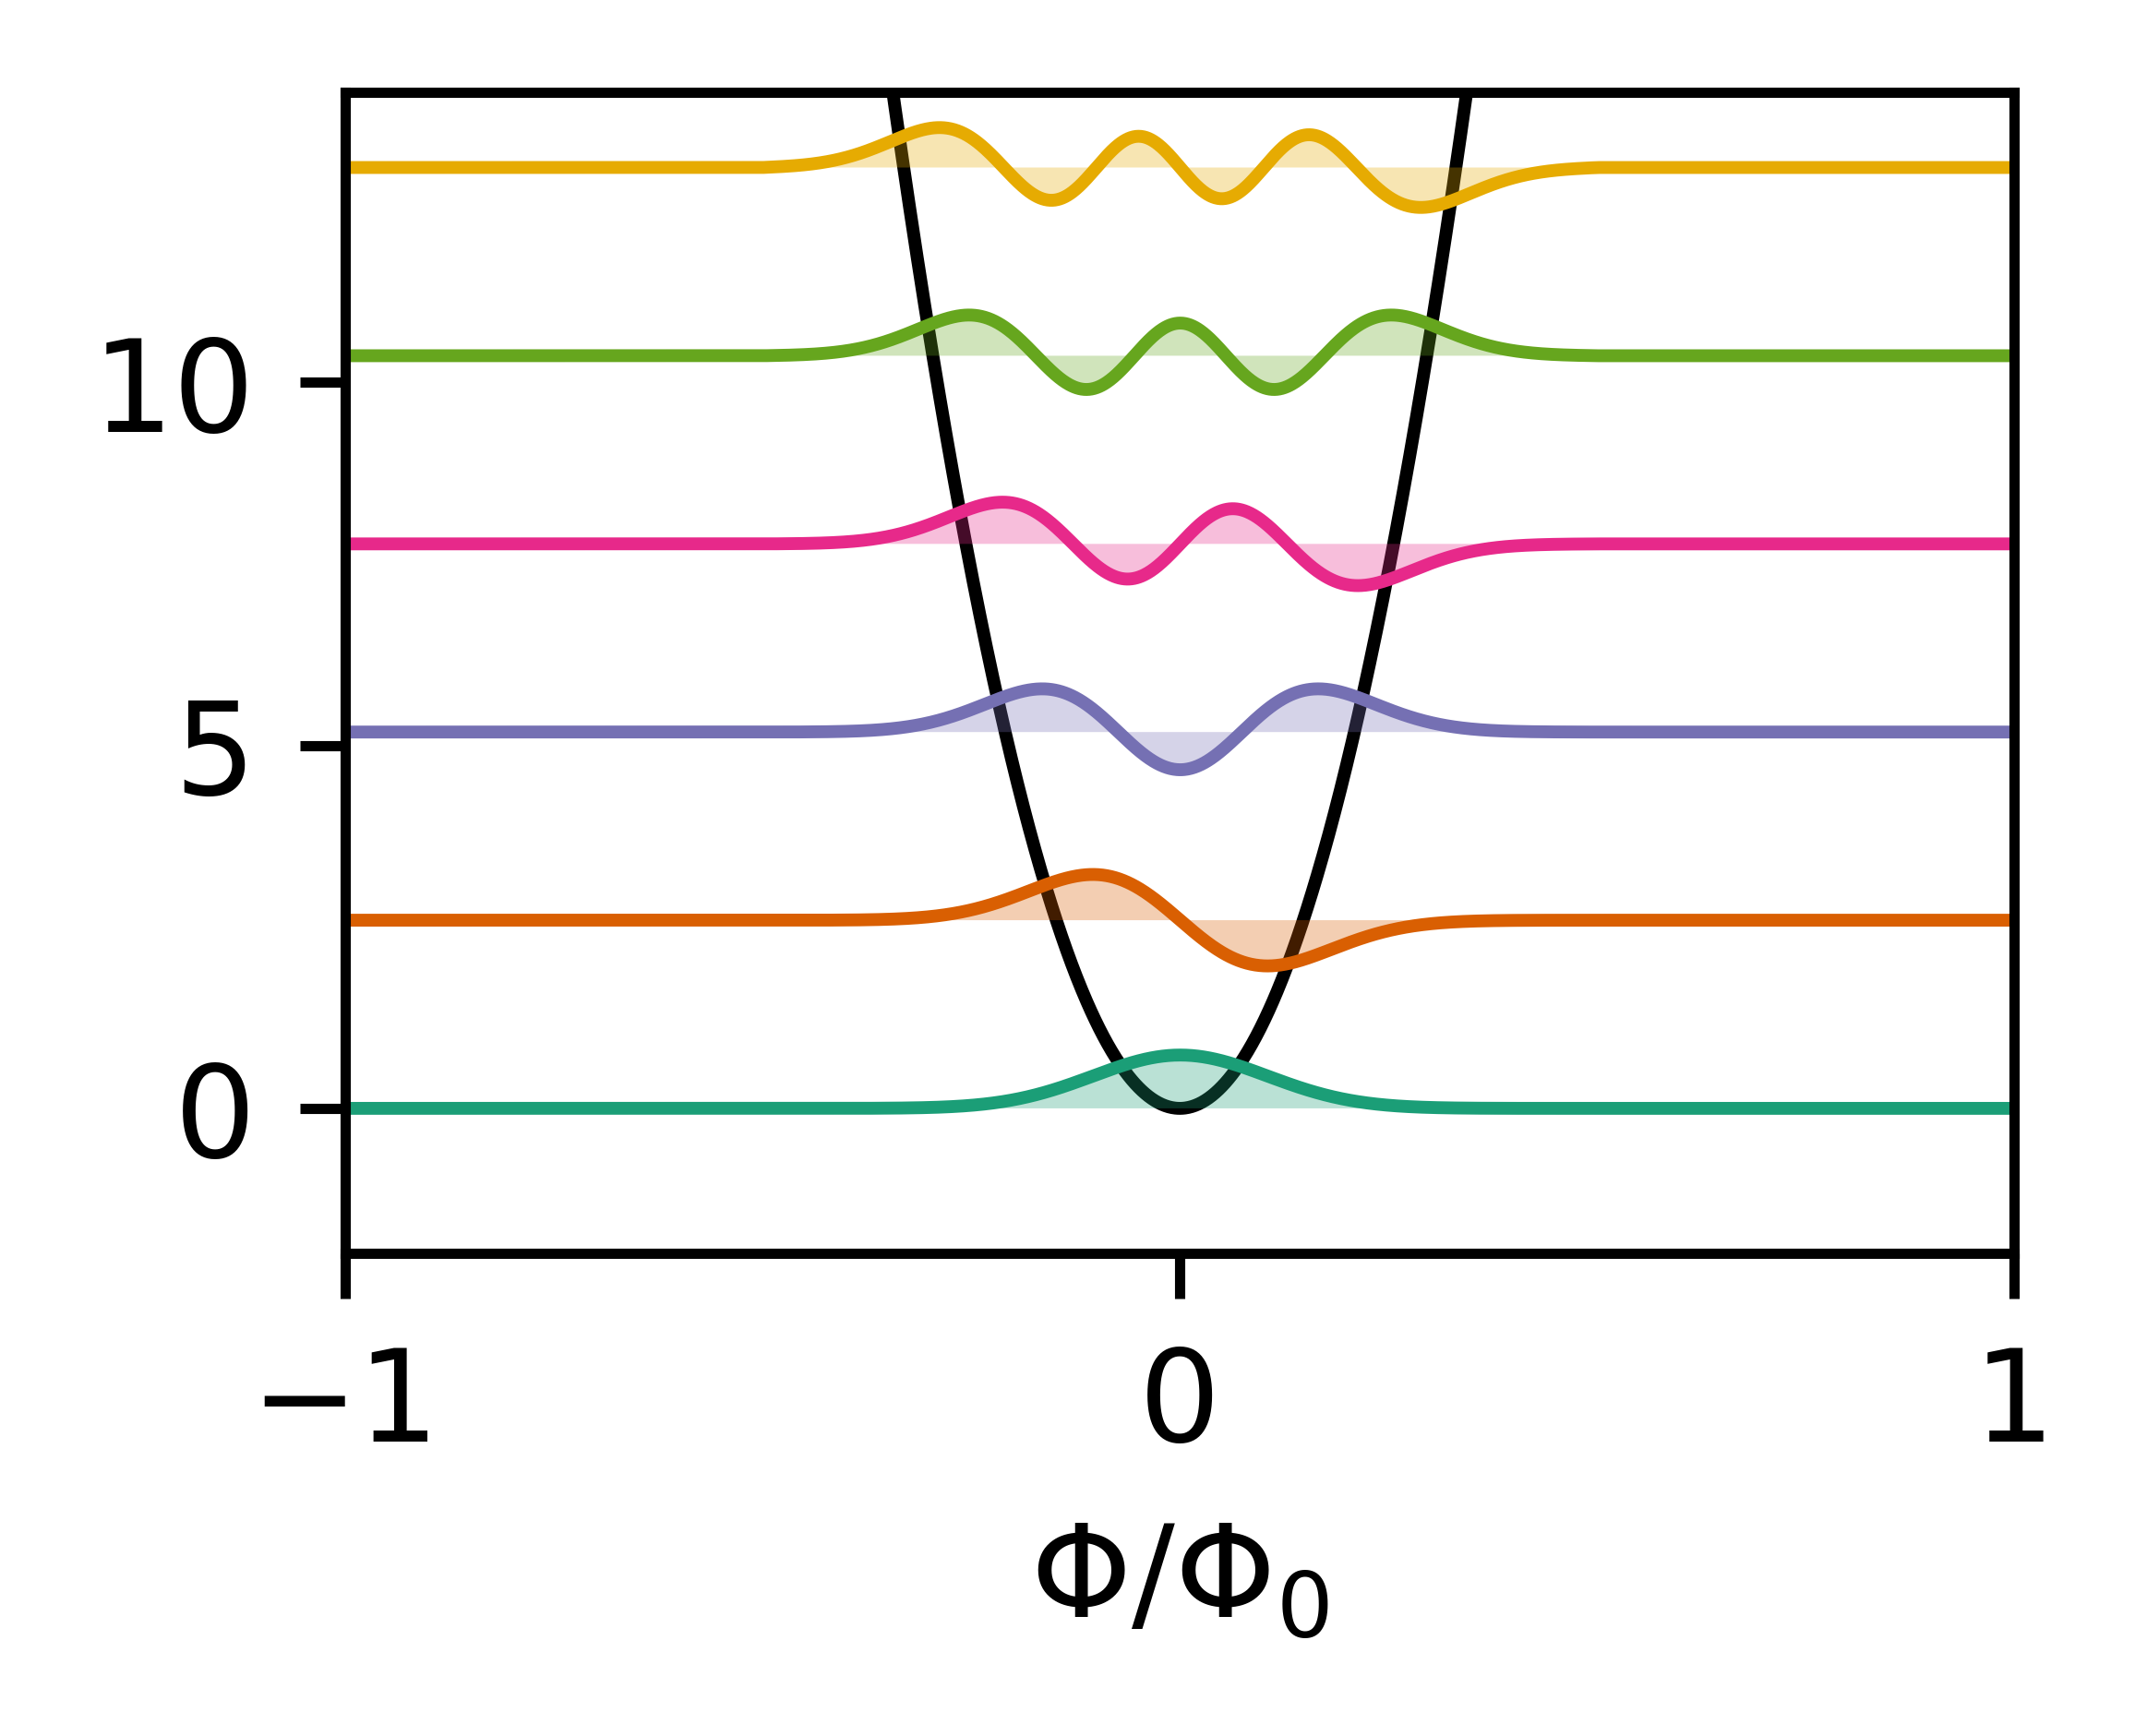

In [165]:
ϕext = 2*np.pi*0.5
evals, estates = get_H(ϕext = ϕext).eigenstates()
evals = evals - evals[0]

n_copies = 3
ϕs = np.linspace(-n_copies*np.pi, n_copies*np.pi, n_copies*N)

colors = iter([plt.cm.Dark2(i) for i in range(20)])

plt.figure('phase wavefunctions', figsize = (3.5/1.5, 2.5/1.5), dpi = 1000)

U = EL*ϕs*ϕs/2

for idx in range(6): 
    state_ϕ = estates[idx].data.todense()
    state_ext = np.concatenate((np.zeros_like(state_ϕ), state_ϕ))
    state_ext = np.concatenate((state_ext, np.zeros_like(state_ϕ)))
    y1 = evals[idx]
    y2 = np.real(state_ext)*10 + evals[idx]
    color = next(colors)
    plt.plot(ϕs/(2*np.pi), y2, color = color, linestyle = '-', linewidth = 1)
    plt.fill_between(ϕs/(2*np.pi), np.array(y2.transpose().tolist()[0]), y2 = y1, color = color, alpha = 0.3, edgecolor = None)
    
    plt.xlim(ϕs[0]/(2*np.pi), ϕs[-1]/(2*np.pi))

plt.plot(ϕs/(2*np.pi), (U - np.min(U)), color = 'k', linestyle = '-', linewidth = 1, zorder = 0)

plt.xlabel(r'$\Phi/\Phi_0$')
plt.xticks([-1, 0, 1])
# plt.yticks([0, 5, 10, 15])
plt.yticks([0, 5, 10])
plt.ylim(-2, 14)
plt.xlim(-1, 1)


## Transmon

In [22]:
EC = 0.18
EJ = 6.0

N = 1000
phis = np.linspace(-np.pi, np.pi, N+1)
phis = phis[:-1]
dphi = (phis[1] - phis[0])  # generates step size ([-1] returns last value in array)

cosϕ = qt.Qobj(np.diag(np.cos(phis)))
sinϕ = qt.Qobj(np.diag(np.sin(phis)))
cos2ϕ = qt.Qobj(np.diag(np.cos(2*phis)))
sin2ϕ = qt.Qobj(np.diag(np.sin(2*phis)))
ϕ = qt.Qobj(np.diag(phis))

Tdiag = -2 * np.eye(N)  # eye(N) returns N-d identity matrix
Tupper = +np.eye(N, k=+1)  # diag returns a 2D array of first number on the 2nd number diagonal
Tlower = +np.eye(N, k=-1)
T = (Tdiag + Tupper + Tlower)
T[0, -1] = 1
T[-1, 0] = 1
T = -T* 4 * EC / dphi ** 2
T = qt.Qobj(T)

def get_H(ϕext = 2*np.pi*0.5): 
    H = T \
      - EJ*cosϕ 
    return H

Text(0, 0.5, 'Energy [GHz]')

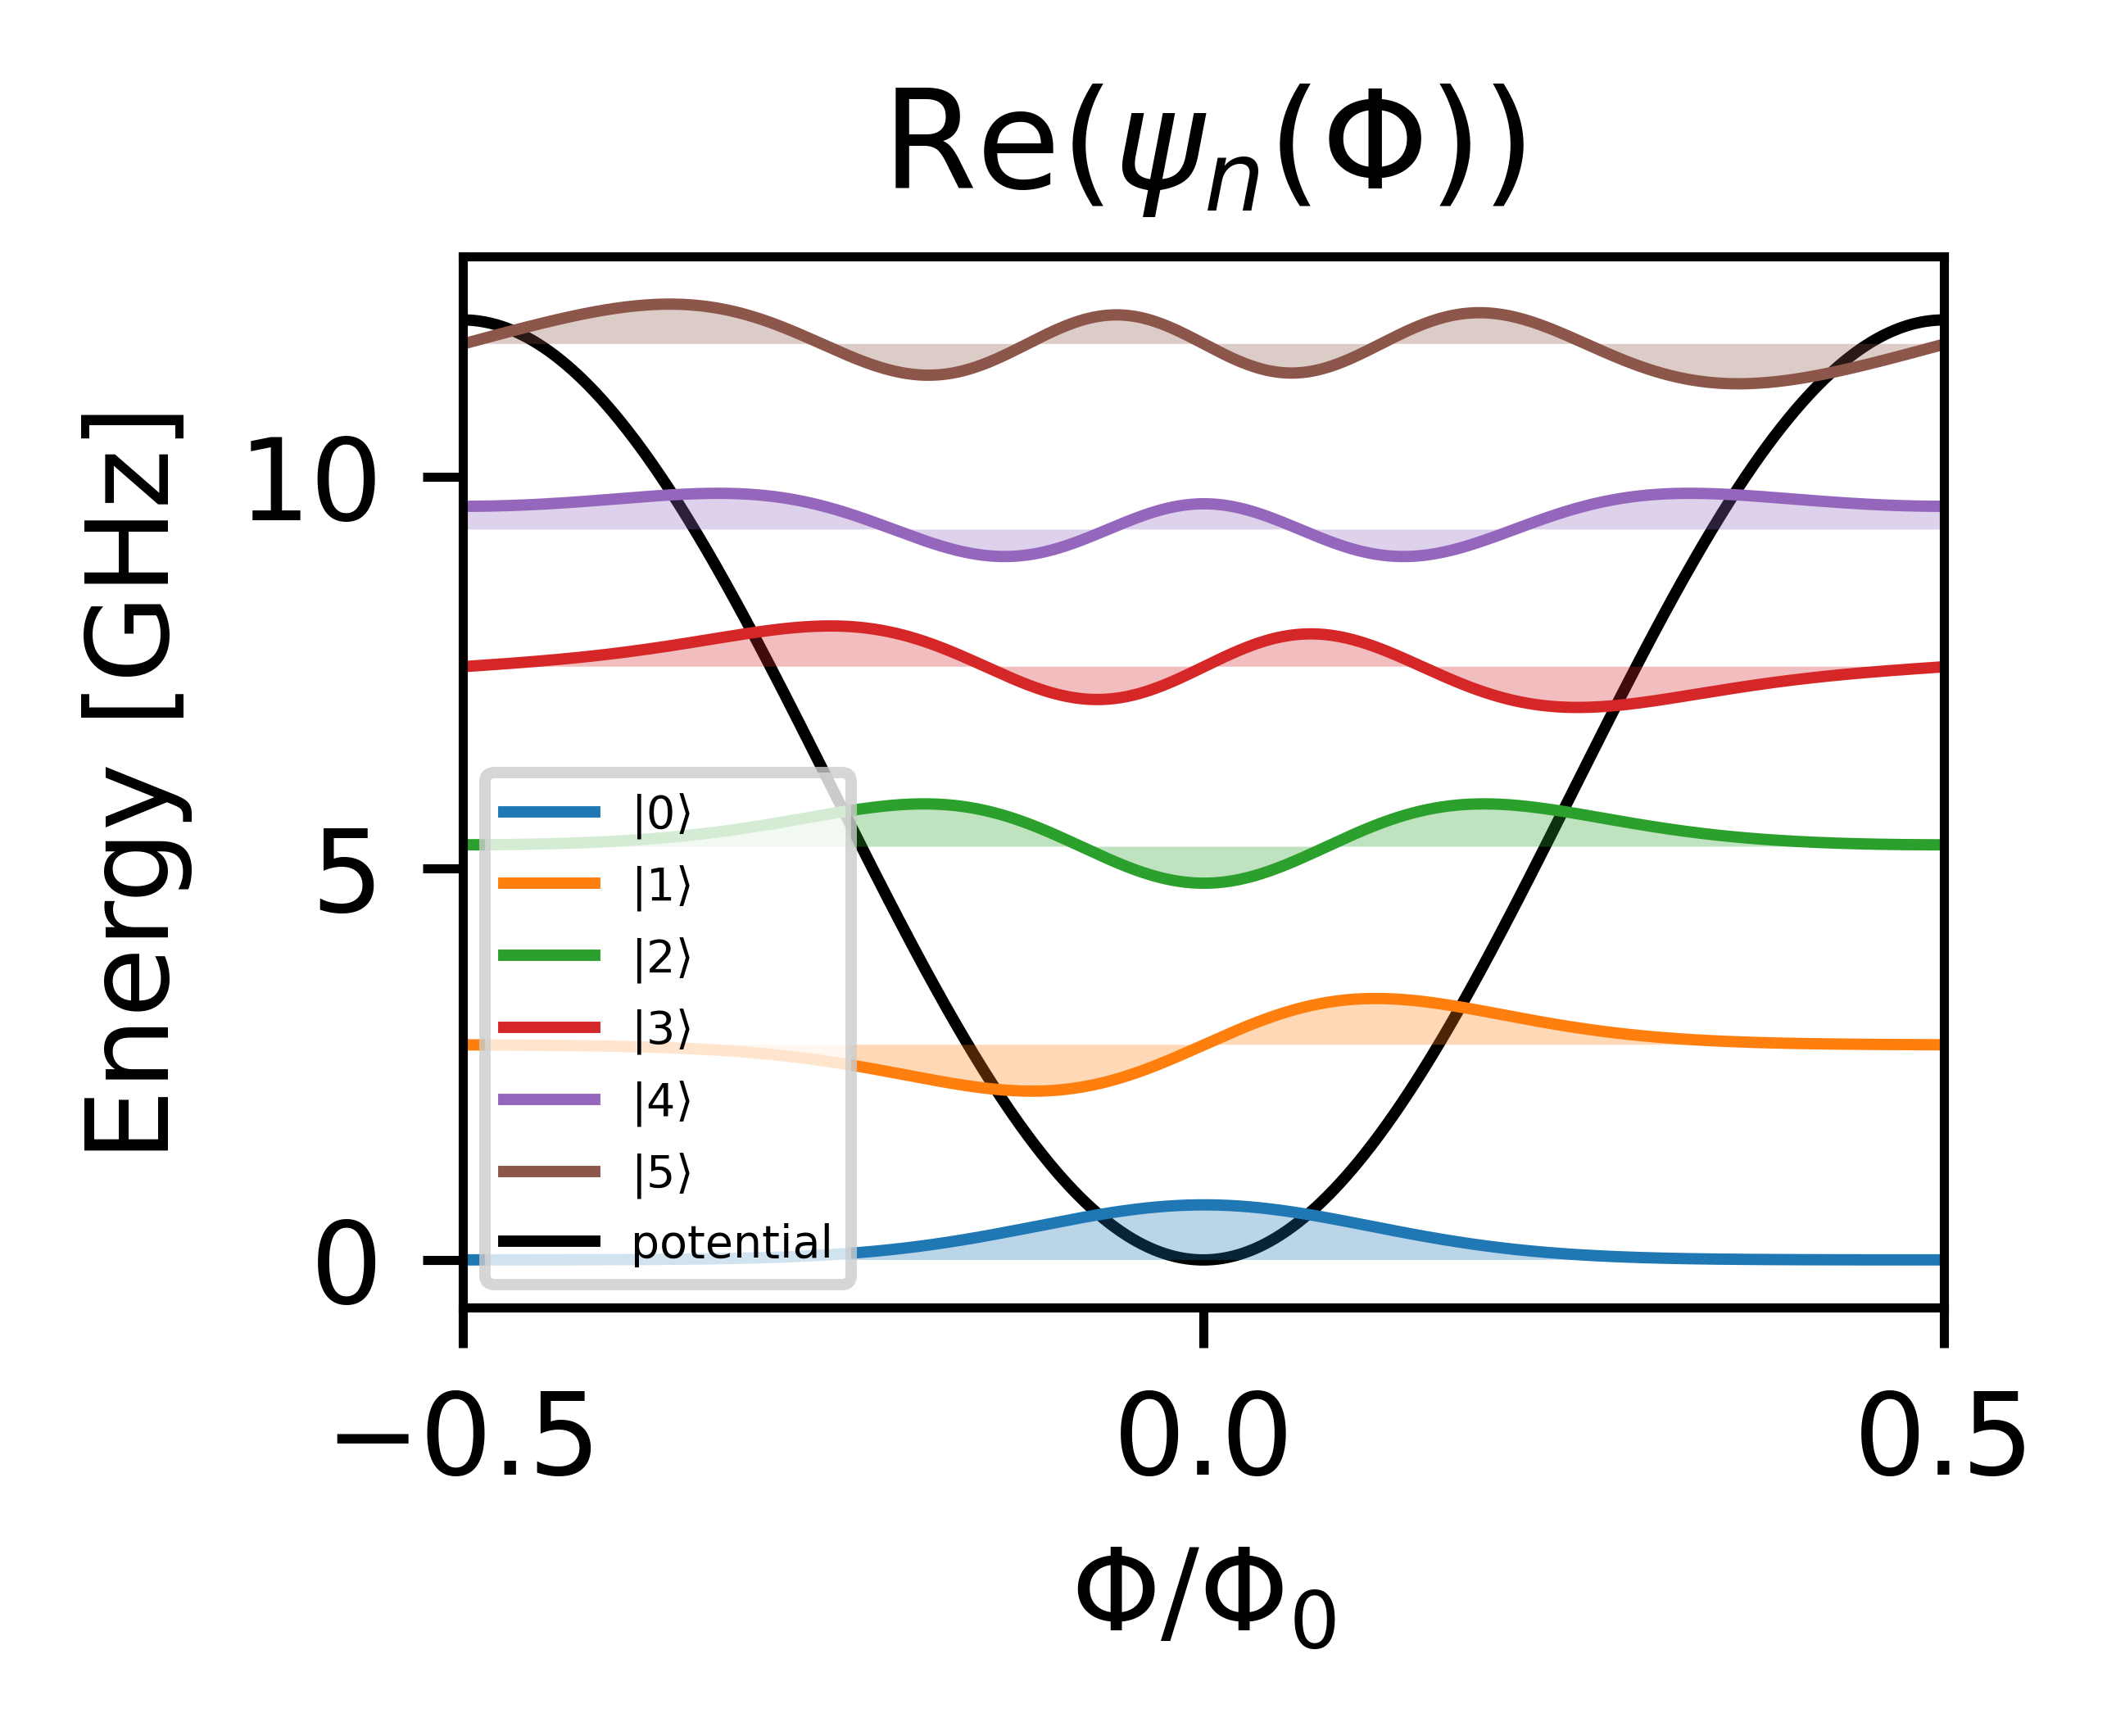

In [32]:
ϕext = 2*np.pi*0.5
evals, estates = get_H(ϕext = ϕext).eigenstates()
evals = evals - evals[0]

n_copies = 3
ϕs = np.linspace(-n_copies*np.pi, n_copies*np.pi, n_copies*N)

colors = iter([plt.cm.Dark2(i) for i in range(20)])

plt.figure('phase wavefunctions', figsize = (3.5/1.5, 2.5/1.5), dpi = 1000)

U = - EJ*np.cos(ϕs)

for idx in range(6): 
    state_ϕ = estates[idx].data.todense()
    state_ext = np.concatenate((state_ϕ, state_ϕ))
    state_ext = np.concatenate((state_ext, state_ϕ))
    y1 = evals[idx]
    y2 = -np.real(state_ext)*10 + evals[idx]
    color = next(colors)
    plt.plot(ϕs/(2*np.pi), y2,  linestyle = '-', linewidth = 1, label=f"$|${idx}$\\rangle$")
    plt.fill_between(ϕs/(2*np.pi), np.array(y2.transpose().tolist()[0]), y2 = y1, alpha = 0.3, edgecolor = None)
    
    plt.xlim(ϕs[0]/(2*np.pi), ϕs[-1]/(2*np.pi))

plt.plot(ϕs/(2*np.pi), (U - np.min(U)), color = 'k', linestyle = '-', linewidth = 1, zorder = 0, label="potential")
plt.legend(fontsize=4, loc="lower left")
plt.xlabel(r'$\Phi/\Phi_0$')
plt.xticks([-0.5, 0, 0.5])
# plt.yticks([0, 5, 10, 15])
plt.yticks([0, 5, 10])
# plt.ylim(-2, 14)
plt.xlim(-0.5, 0.5)
plt.title("Re($\psi_n(\\Phi)$)")
plt.ylabel("Energy [GHz]")

## Fluxonium

In [167]:
N = 1000
phis = np.linspace(-5*np.pi, 5*np.pi, N+1)
phis = phis[:-1]
dphi = (phis[1] - phis[0])  # generates step size ([-1] returns last value in array)

cosϕ = qt.Qobj(np.diag(np.cos(phis)))
sinϕ = qt.Qobj(np.diag(np.sin(phis)))
ϕ = qt.Qobj(np.diag(phis))

Tdiag = -2 * np.eye(N)  # eye(N) returns N-d identity matrix
Tupper = +np.eye(N, k=+1)  # diag returns a 2D array of first number on the 2nd number diagonal
Tlower = +np.eye(N, k=-1)
T = (Tdiag + Tupper + Tlower)
# T[0, -1] = 1
# T[-1, 0] = 1
T = -T* 4 * EC / dphi ** 2
T = qt.Qobj(T)

EL = EJ/30

def get_H(ϕext = 2*np.pi*0.5): 
    H = 5*T \
      - EJ*cosϕ*np.cos(ϕext) \
      + EJ*sinϕ*np.sin(ϕext) \
     + EL*ϕ*ϕ/2
    return H

(-2.0, 2.0)

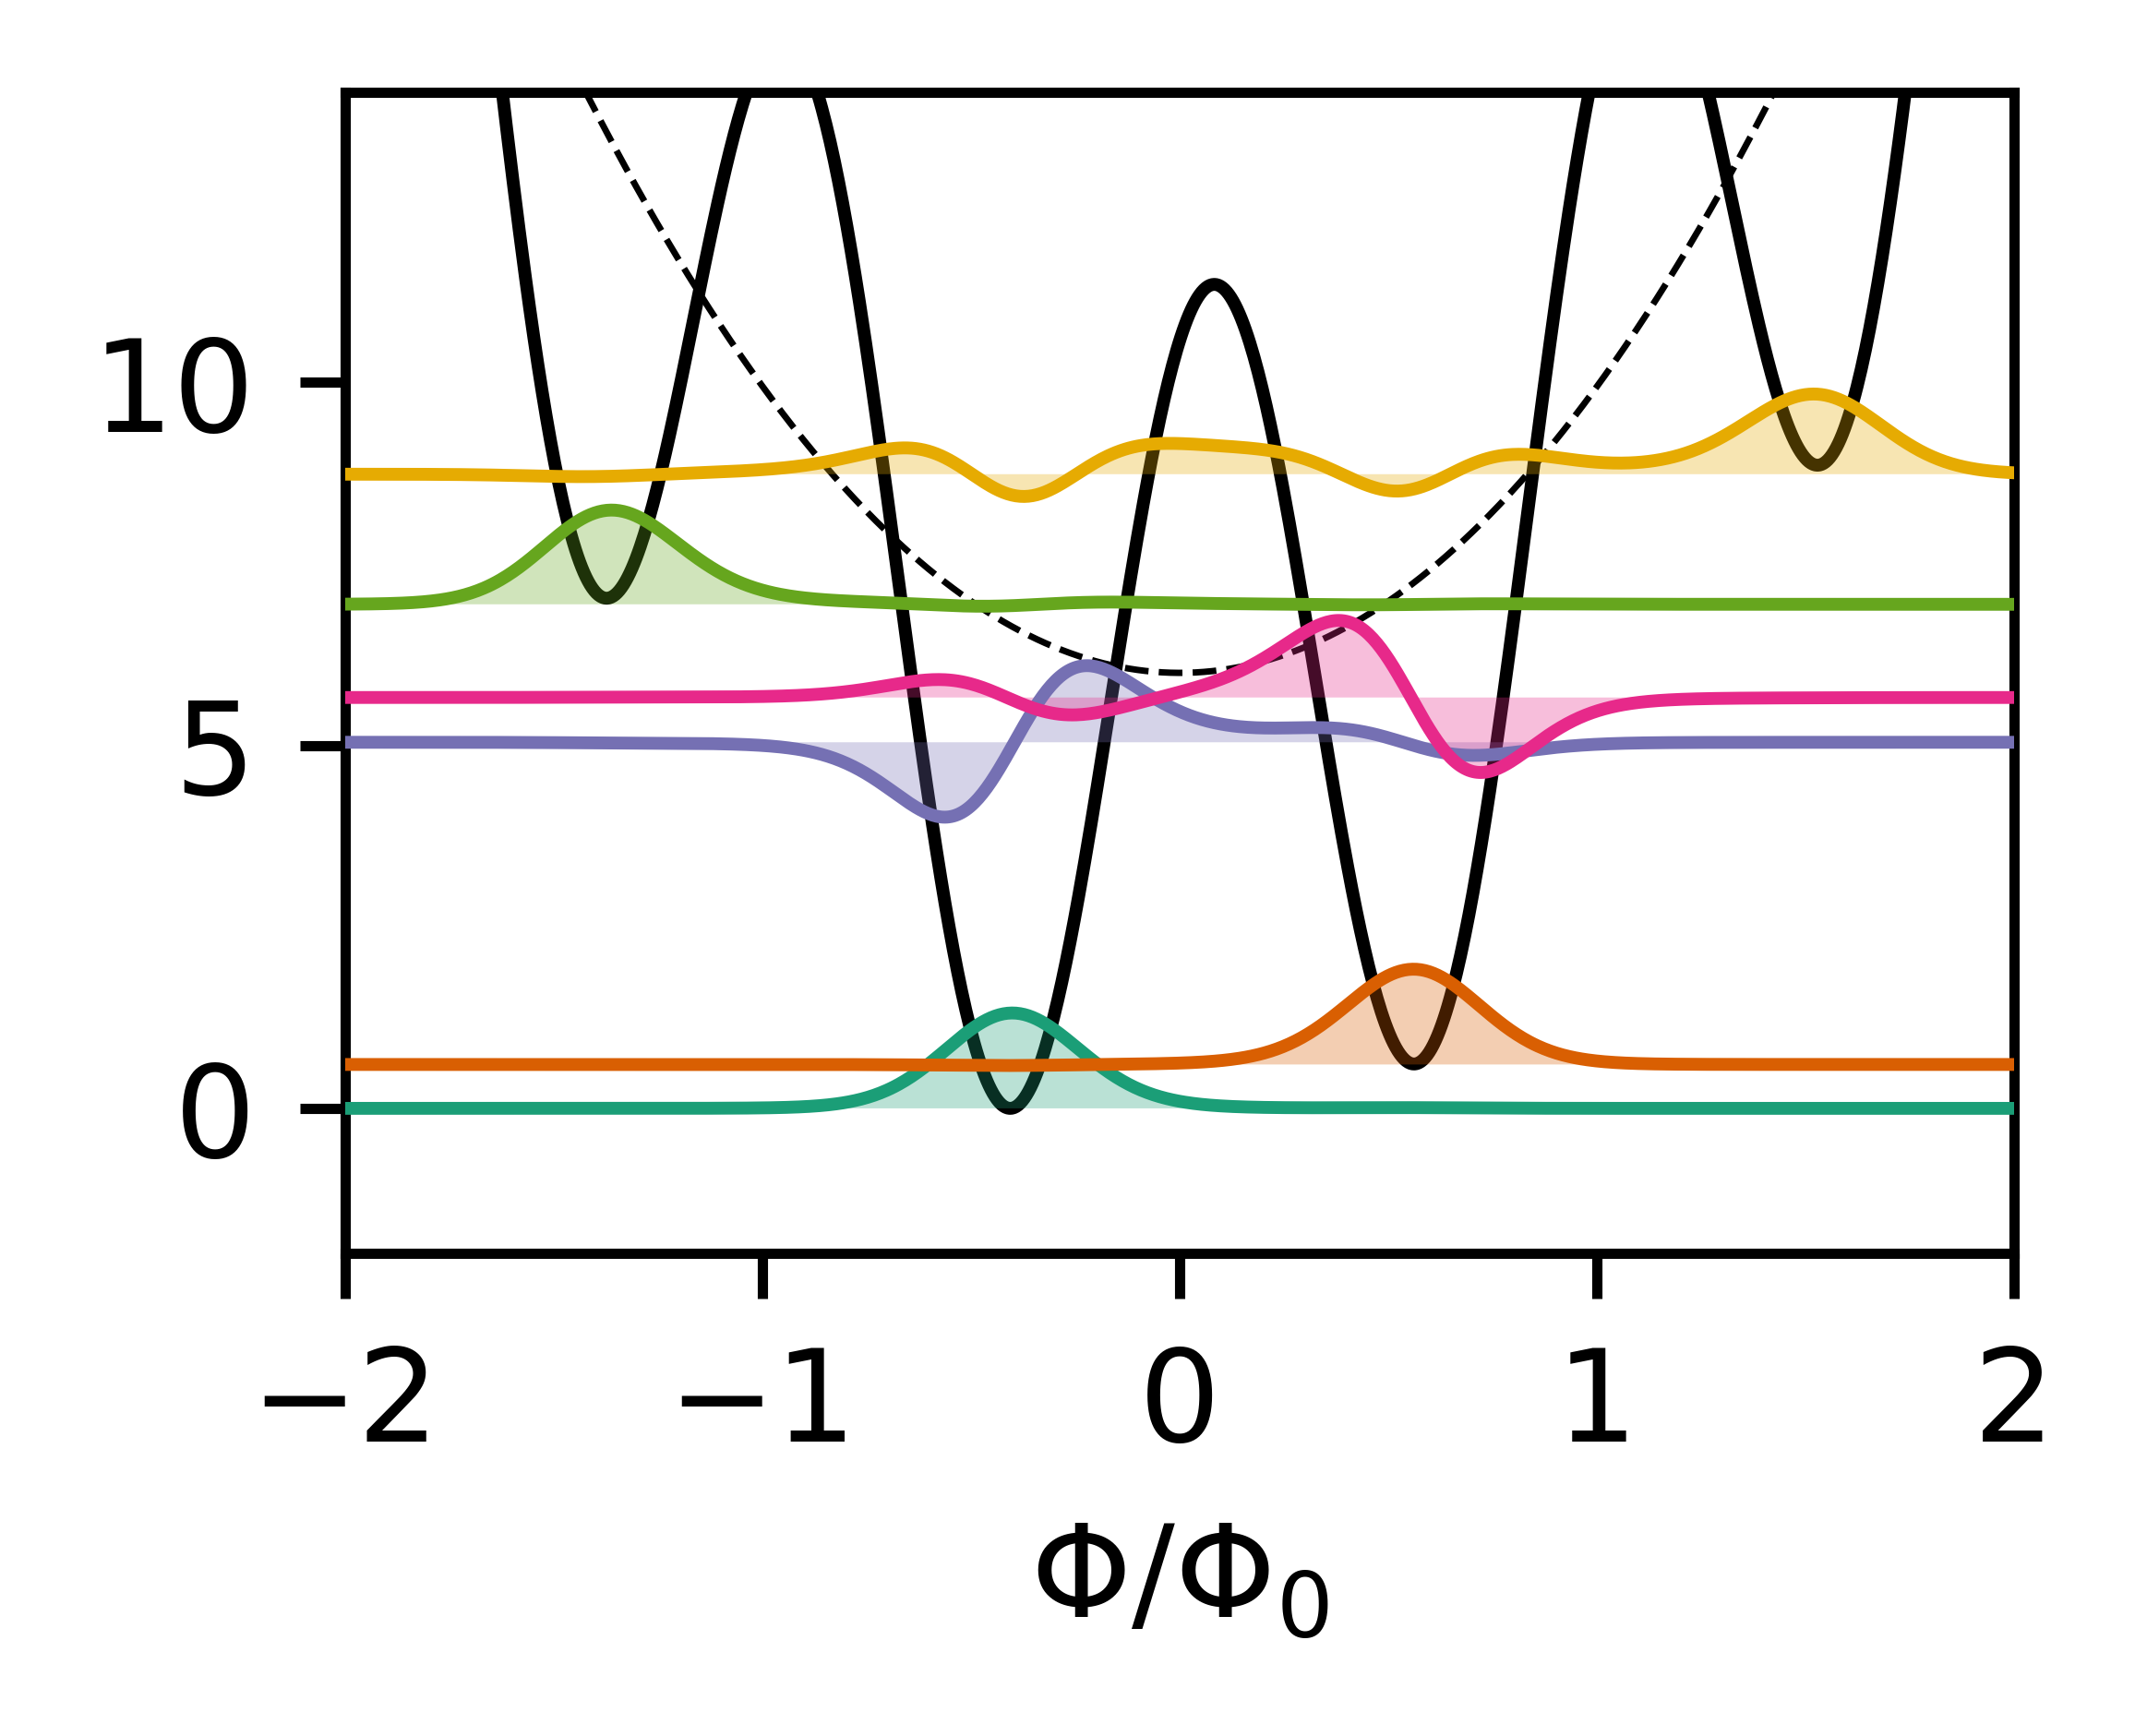

In [170]:
ϕext = 2*np.pi*0.42
evals, estates = get_H(ϕext = ϕext).eigenstates()
evals = evals - evals[0]

n_copies = 3
ϕs = np.linspace(-n_copies*5*np.pi, n_copies*5*np.pi, n_copies*N)

colors = iter([plt.cm.Dark2(i) for i in range(20)])

plt.figure('phase wavefunctions', figsize = (3.5/1.5, 2.5/1.5), dpi = 1000)

U = -EJ*np.cos(ϕs - ϕext) + EL*ϕs*ϕs/2

for idx in range(6): 
    state_ϕ = estates[idx].data.todense()
    state_ext = np.concatenate((np.zeros_like(state_ϕ), state_ϕ))
    state_ext = np.concatenate((state_ext, np.zeros_like(state_ϕ)))
    y1 = evals[idx]
    y2 = np.real(state_ext)*10 + evals[idx]
    color = next(colors)
    plt.plot(ϕs/(2*np.pi), y2, color = color, linestyle = '-', linewidth = 1, zorder = 100)
    plt.fill_between(ϕs/(2*np.pi), np.array(y2.transpose().tolist()[0]), y2 = y1, color = color, alpha = 0.3, edgecolor = None)
    
    plt.xlim(ϕs[0]/(2*np.pi), ϕs[-1]/(2*np.pi))

plt.plot(ϕs/(2*np.pi), (U - np.min(U))[::-1], color = 'k', linestyle = '-', linewidth = 1, zorder = 0)
plt.plot(ϕs/(2*np.pi), EL/2*ϕs**2 + EJ, color = 'k', linestyle = '--', linewidth = 0.5, zorder = 0)


plt.xlabel(r'$\Phi/\Phi_0$')
plt.xticks([-2, -1, 0, 1, 2])
# plt.yticks([0, 5, 10, 15])
plt.yticks([0, 5, 10])
plt.ylim(-2, 14)
plt.xlim(-2, 2)


(-11.0, 11.0, -4.999998949789968, 104.99999994999)

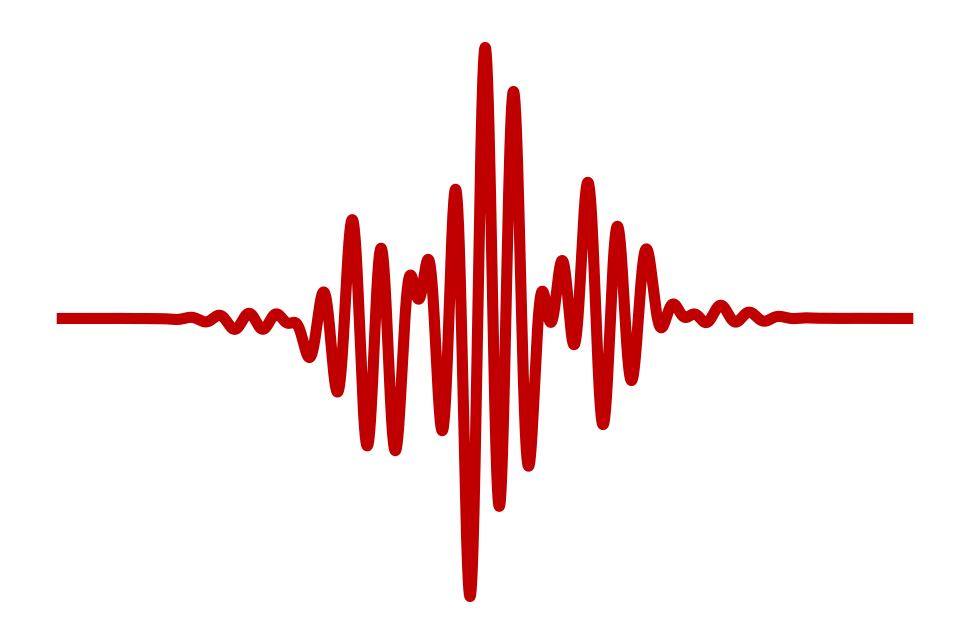

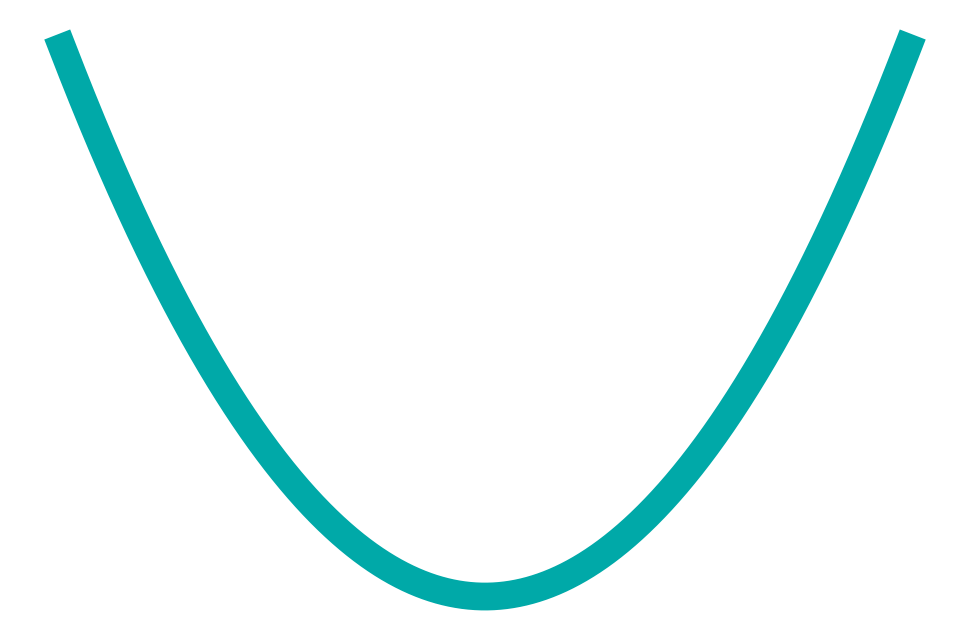

In [206]:
x = np.linspace(-10, 10, 10000)
y = (np.cos(10.0*x) + np.cos(8.0*x+0.1) + 0.4*np.sin(3.5*x+0.3) + np.sin(0.1*x))*(np.exp(-x**2/10.0))
plt.figure(dpi = 200)
plt.plot(x, y, color = '#C00000', linewidth = 4)
plt.axis('off')

x = np.linspace(-10, 10, 10000)
plt.figure(dpi = 200)
plt.plot(x, x**2, color = '#00A9A8', linewidth = 10)
plt.axis('off')
